In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import tensorflow.keras.backend as K
%matplotlib inline

## Implementing a Convolution Neural Network

In [2]:
data = tfds.load('cifar10')

In [3]:
for i in data["train"].take(1):
    print(i)

{'image': <tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[143,  96,  70],
        [141,  96,  72],
        [135,  93,  72],
        ...,
        [ 96,  37,  19],
        [105,  42,  18],
        [104,  38,  20]],

       [[128,  98,  92],
        [146, 118, 112],
        [170, 145, 138],
        ...,
        [108,  45,  26],
        [112,  44,  24],
        [112,  41,  22]],

       [[ 93,  69,  75],
        [118,  96, 101],
        [179, 160, 162],
        ...,
        [128,  68,  47],
        [125,  61,  42],
        [122,  59,  39]],

       ...,

       [[187, 150, 123],
        [184, 148, 123],
        [179, 142, 121],
        ...,
        [198, 163, 132],
        [201, 166, 135],
        [207, 174, 143]],

       [[187, 150, 117],
        [181, 143, 115],
        [175, 136, 113],
        ...,
        [201, 164, 132],
        [205, 168, 135],
        [207, 171, 139]],

       [[195, 161, 126],
        [187, 153, 123],
        [186, 151, 128],
        ...,
        [212,

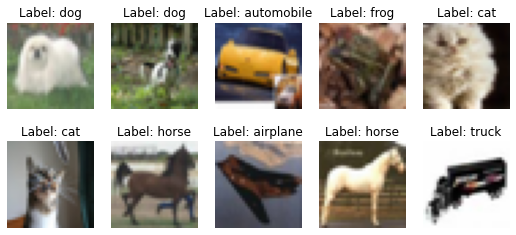

In [4]:
sample_images, sample_labels = [],[]
for d in data["train"].shuffle(100, seed=4321).take(10):
    sample_images.append(d["image"].numpy())
    sample_labels.append(d["label"].numpy())

label_map = dict(zip(
    list(range(10)),
    ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]))
f, axes = plt.subplots(2, 5, figsize=(9,4))
for i, (img, lbl) in enumerate(zip(sample_images, sample_labels)):
    r, c = i//5, i%5
    axes[r,c].imshow(img,cmap='gray')
    axes[r,c].axis('off')
    axes[r,c].set_title("Label: {}".format(label_map[lbl]))

In [5]:
cnn = models.Sequential(
    [layers.Conv2D(filters=16,kernel_size=(9,9), strides=(2,2), activation='relu', input_shape=(32,32,3)), # 32->12
     layers.Conv2D(32, (7,7), activation='relu'), # 12 -> 6
     layers.Conv2D(64, (7,7), activation='relu'), # 6 -> -1
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')]
)

ValueError: Negative dimension size caused by subtracting 7 from 6 for 'conv2d_2/Conv2D' (op: 'Conv2D') with input shapes: [?,6,6,32], [7,7,32,64].

In [6]:
cnn = models.Sequential(
    [layers.Conv2D(filters=16,kernel_size=(3,3), strides=(2,2), activation='relu', padding='same', input_shape=(32,32,3)), # 32->16
     layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'), # 16->8
     layers.Conv2D(32, (3,3), activation='relu', padding='same'), # 8 -> 8
     layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'), # 8->4
     layers.Flatten(),
     layers.Dense(64, activation='relu'),
     layers.Dense(32, activation='relu'),
     layers.Dense(10, activation='softmax')]
)
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [7]:
def format_data(x, depth):
    return (tf.cast(x["image"], 'float32'), tf.one_hot(x["label"], depth=depth))
tr_data = data["train"].map(lambda x: format_data(x, depth=10)).batch(32)

history = cnn.fit(tr_data,epochs=25)

Epoch 1/25
1563/1563 [==============================] - 20s 13ms/step - loss: 1.9501 - acc: 0.3278
Epoch 2/25
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4575 - acc: 0.4734
Epoch 3/25
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3002 - acc: 0.5332
Epoch 4/25
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2058 - acc: 0.5701
Epoch 5/25
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1456 - acc: 0.5919
Epoch 6/25
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1012 - acc: 0.6087
Epoch 7/25
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0703 - acc: 0.6215
Epoch 8/25
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0335 - acc: 0.6359
Epoch 9/25
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0140 - acc: 0.6422
Epoch 10/25
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9865 - acc: 0.6517
Epoch 11/25
1563/1